In [2]:
import numpy as np
from scipy import optimize
from scipy import fftpack
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from scipy.ndimage import convolve, gaussian_filter

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

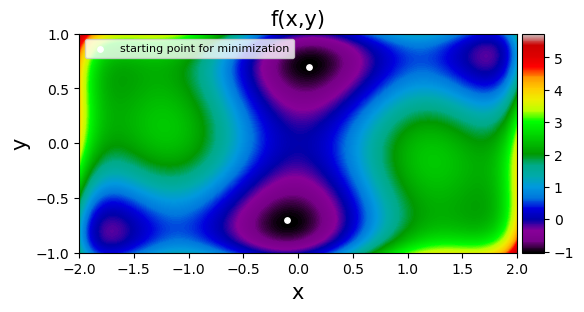

Looking at the plot above, the darkest regions are the ones that should identify the minima of the function. The white points are those choosen as starting points for the minimization.

Result of minimization with starting guess (0.1,0.7):
Minimum found: f([-0.08984158  0.71265641]) = -1.031628453489153

Result of minimization with starting guess (-0.1,-0.7):
Minimum found: f([ 0.08984157 -0.71265643]) = -1.0316284534891047

The two minimization processes lead to two global minima. The found minima are symmetric w.r.t. the origin of x,y (as we expect, since we have that f(x,y) = f(-x,-y))

Result of minimization with starting guess (0,0):
Minimum found: f([0. 0.]) = 0.0

For an initial guess (0,0), the minimization process lead a local minimum, which is a saddle point.


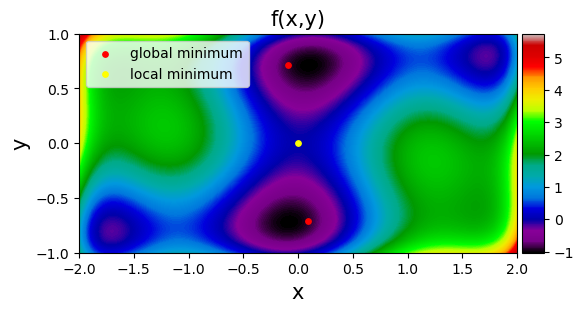

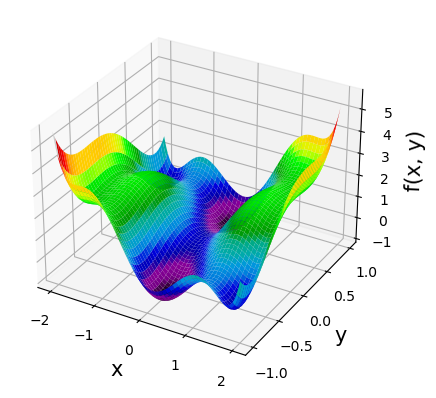

In [3]:
# Ex. 1.

# Define function to analyse
def f(data):
    x, y = data
    f = (4.-2.1*x**2 + (1./3.)*x**4)*x**2 + x*y + (4.*y**2-4.)*y**2
    return f

# Define grid
x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y, sparse=True)
data = X,Y

# Plot
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
h = ax.imshow(f(data), extent=[-2, 2, -1, 1], cmap = "nipy_spectral")
ax.set_title('f(x,y)', fontsize = 15)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.scatter(0.1, 0.7, s = 15, c = 'white', marker = 'o', label="starting point for minimization")
ax.scatter(-0.1, -0.7, s = 15, c = 'white', marker = 'o')
ax.legend(loc='upper left', prop={'size': 8})
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
plt.show()

print('Looking at the plot above, the darkest regions are the ones that should identify the minima of the function. The white points are those choosen as starting points for the minimization.')

# Minimization
res0 = optimize.minimize(f, (0,0))
res1 = optimize.minimize(f, (0.1,0.7))
res2 = optimize.minimize(f, (-0.1,-0.7))

print('\nResult of minimization with starting guess (0.1,0.7):')
print('Minimum found: f({}) = {}'.format(res1.x, res1.fun))
print('\nResult of minimization with starting guess (-0.1,-0.7):')
print('Minimum found: f({}) = {}'.format(res2.x, res2.fun))
print('\nThe two minimization processes lead to two global minima. The found minima are symmetric w.r.t. the origin of x,y (as we expect, since we have that f(x,y) = f(-x,-y))')

print('\nResult of minimization with starting guess (0,0):')
print('Minimum found: f({}) = {}'.format(res0.x, res0.fun))
print("\nFor an initial guess (0,0), the minimization process lead a local minimum, which is a saddle point.")

# Plot
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
h = ax.imshow(f(data), extent=[-2, 2, -1, 1], cmap = "nipy_spectral")
ax.set_title('f(x,y)', fontsize = 15)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.scatter(res1.x[0], res1.x[1], s = 15, c = 'r', marker = 'o', label="global minimum")
ax.scatter(res2.x[0], res2.x[1], s = 15, c = 'r', marker = 'o')
ax.scatter(res0.x[0], res0.x[1], s = 15, c = 'yellow', marker = 'o', label="local minimum")
ax.legend(loc='upper left')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
plt.show()

# 3d plot
Z = f(data)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X,Y,Z,cmap="nipy_spectral")
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('f(x, y)', fontsize = 15)
plt.show()

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\Omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

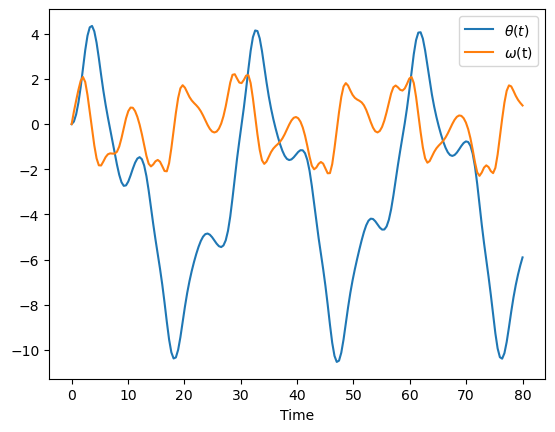

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that computes the derivatives of theta and omega
def derivatives(variables, t, Q, d, Omega):
    theta, omega = variables
    dtheta_dt = omega
    domega_dt = -1/Q * omega + np.sin(theta) + d * np.cos(Omega * t)
    return dtheta_dt, domega_dt

# Initial conditions
theta0 = 0
omega0 = 0

# Parameters
Q = 2.0
d = 1.5
Omega = 0.65

# Time grid for the solution
t = np.linspace(0, 80, 200)

# Solve the ODE
solution = odeint(derivatives, [theta0, omega0], t, args=(Q, d, Omega))
theta, omega = solution[:,0], solution[:,1]

# Plot theta and omega as functions of time
plt.plot(t, theta, label=r"$\theta(t)$")
plt.plot(t, omega, label=r"$\omega$(t)")
plt.xlabel('Time')
plt.legend()
plt.show()

To determine if there is a set of parameters for which the motion is chaotic, you can try varying the values of $Q$, $d$, and $\Omega$ and observe the resulting plots of $\theta(t)$ and $\omega(t)$. If the plots exhibit seemingly random and unpredictable behavior, then the motion is likely chaotic. For example, by increasing $\Omega$, a chaotic motion can be found:

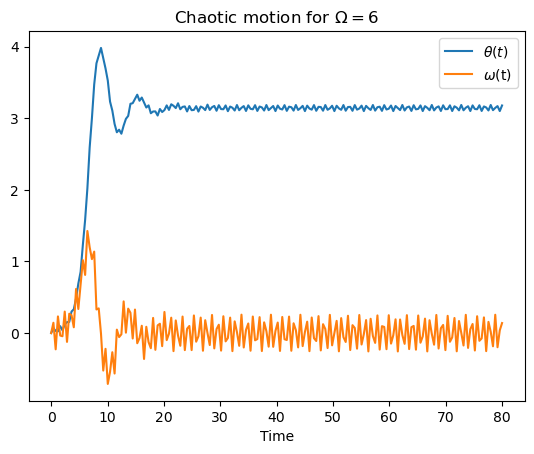

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that computes the derivatives of theta and omega
def derivatives(variables, t, Q, d, Omega):
    theta, omega = variables
    dtheta_dt = omega
    domega_dt = -1/Q * omega + np.sin(theta) + d * np.cos(Omega * t)
    return dtheta_dt, domega_dt

# Initial conditions
theta0 = 0
omega0 = 0

# Parameters
Q = 2.0
d = 1.5
Omega = 6 #changed parameter

# Time grid for the solution
t = np.linspace(0, 80, 200)

# Solve the ODE
solution = odeint(derivatives, [theta0, omega0], t, args=(Q, d, Omega))
theta, omega = solution[:,0], solution[:,1]

# Plot theta and omega as functions of time
plt.plot(t, theta, label=r"$\theta(t)$")
plt.plot(t, omega, label=r"$\omega$(t)")
plt.title('Chaotic motion for $\Omega=6$')
plt.xlabel('Time')
plt.legend()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

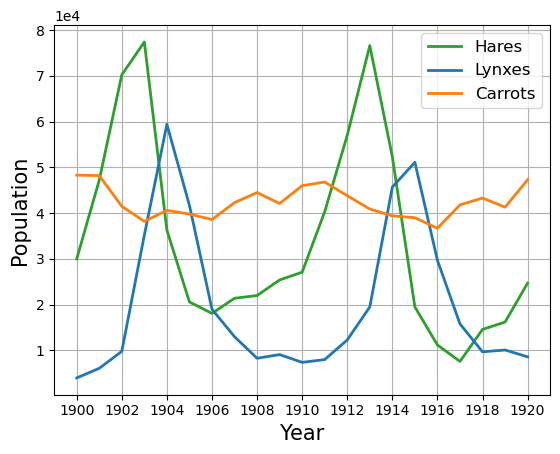

The graph above depicts a clearly periodic trend of the three populations.


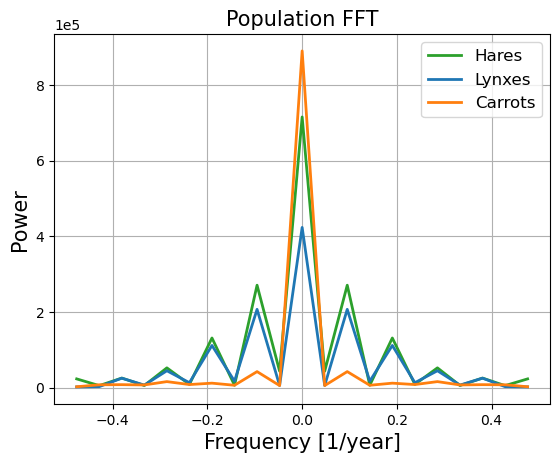

From the graph above, we can see that all cases present a component of constant signal (peak at frequency=0) but at the same time there are also periodic contibutions to the signal by some frequencies (peaks at frequencies different from 0). In particular, the most intense one is:
- first peak at frequency different from 0 for lynxes population: 0.09523809523809523 1/years
- first peak at frequency different from 0 for hares population: 0.09523809523809523 1/years
- first peak at frequency different from 0 for carrots population: 0.09523809523809523 1/years
Clearly, the frequencies corresponding to the first peak for different populations are the same.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30240\977068643.py:72: RuntimeWarning: divide by zero encountered in true_divide
  period = 1./freq


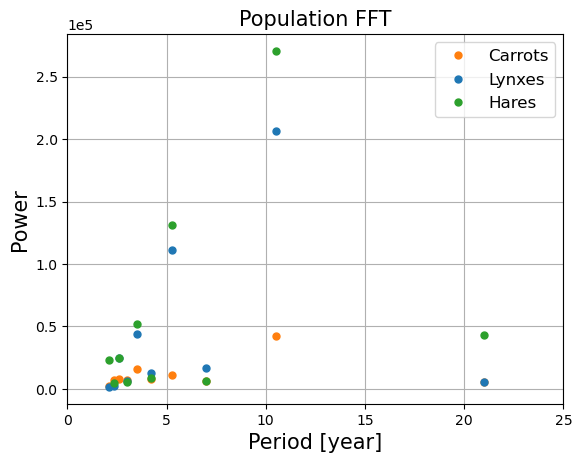

From the graph above, we can see that there is a period where the power becomes maximum.
The period is 10.5 years for all the populations.


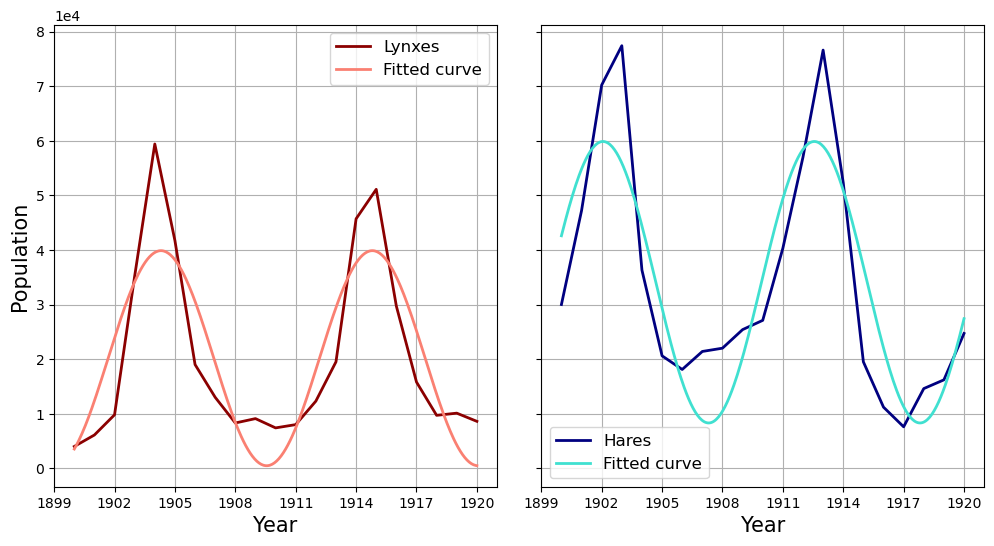

From the graph above, we can see that the estimated period, used to perform a cosine fit, is compatible with the trend of the datasets.


In [8]:
# Ex. 3.

# Import file
data = np.loadtxt("https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt?dl=1")
years, hares, lynxes, carrots = data[:,0], data[:,1], data[:,2], data[:,3]
classes = [hares, carrots, lynxes]

# Data plot
plt.plot(years, hares, label='Hares', c='C2', linewidth=2)
plt.plot(years, lynxes, label='Lynxes', c='C0', linewidth=2)
plt.plot(years, carrots, label='Carrots', c='C1', linewidth=2)
plt.legend(fontsize=12)
plt.xticks(np.arange(years[0], years[-1]+1, 2.0))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
plt.grid()
plt.show()

print("The graph above depicts a clearly periodic trend of the three populations.")

# FFT of the signal
sig_fft_hares = fftpack.fft(hares)
sig_fft_carrots = fftpack.fft(carrots)
sig_fft_lynxes = fftpack.fft(lynxes)

# Power spectrum (sig_fft is of complex dtype)
power_hares = np.abs(sig_fft_hares)
power_lynxes = np.abs(sig_fft_lynxes)
power_carrots = np.abs(sig_fft_carrots)

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(years.size, d=1)

# Sort the arrays in frequency order
sample_freq_sorted = sorted(sample_freq)
mask = np.argsort(np.array(sample_freq))
power_hares_sorted = power_hares[mask]
power_lynxes_sorted = power_lynxes[mask]
power_carrots_sorted = power_carrots[mask]

# Plot the power spectrum
plt.plot(sample_freq_sorted, power_hares_sorted, linewidth=2, label='Hares', c='C2')
plt.plot(sample_freq_sorted, power_lynxes_sorted, linewidth=2, label='Lynxes', c='C0')
plt.plot(sample_freq_sorted, power_carrots_sorted, linewidth=2, label='Carrots', c='C1')
plt.title('Population FFT',fontsize=15)
plt.xlabel('Frequency [1/year]',fontsize=15)
plt.ylabel("Power",fontsize=15)
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Find the peak frequency (max of freqs array): focus only on the positive frequencies
mask_pos = np.where(sample_freq > 0)
sample_freq_pos = sample_freq[mask_pos]
power_hares_pos = power_hares[mask_pos]
power_lynxes_pos = power_lynxes[mask_pos]
power_carrots_pos = power_carrots[mask_pos]
peak_freq_hares = sample_freq_pos[power_hares_pos.argmax()]
peak_freq_lynxes = sample_freq_pos[power_lynxes_pos.argmax()]
peak_freq_carrots = sample_freq_pos[power_carrots_pos.argmax()]

print("From the graph above, we can see that all cases present a component of constant signal (peak at frequency=0) but at the same time there are also periodic contibutions to the signal by some frequencies (peaks at frequencies different from 0). In particular, the most intense one is:") 
print("- first peak at frequency different from 0 for lynxes population:", peak_freq_lynxes, "1/years")
print("- first peak at frequency different from 0 for hares population:", peak_freq_hares, "1/years")
print("- first peak at frequency different from 0 for carrots population:", peak_freq_carrots, "1/years")
print("Clearly, the frequencies corresponding to the first peak for different populations are the same.")

# Find periods from frequencies
freq = fftpack.fftfreq(years.shape[0], years[1] - years[0])
period = 1./freq

# Plot of power versus period
plt.plot(period, power_carrots, 'o', markersize=5, label='Carrots', c="C1")
plt.plot(period, power_lynxes, 'o', markersize=5, label='Lynxes', c="C0")
plt.plot(period, power_hares, 'o', markersize=5, label='Hares', c="C2")
plt.xlim(0, 25)
plt.title('Population FFT',fontsize=15)
plt.xlabel('Period [year]',fontsize=15)
plt.ylabel('Power',fontsize=15)
plt.legend(fontsize=12)
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
plt.grid()
plt.show()

print("From the graph above, we can see that there is a period where the power becomes maximum.")
print('The period is {} years for all the populations.'.format(1./peak_freq_lynxes))

# Fitting the data with the cosine function using the found period
def period_ly(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi * peak_freq_lynxes))
def period_ha(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi * peak_freq_hares))
params_ly, cov_params_ly = optimize.curve_fit(period_ly, years, lynxes, p0 = [30000, 25000, 0])
params_ha, cov_params_ha = optimize.curve_fit(period_ha, years, hares, p0 = [30000, 25000, 0])
day = np.linspace(1900, 1920, num = 365)

# Data plot with the fitted function
fig, axes = plt.subplots(nrows=1, ncols=2, tight_layout=False, figsize=(12, 6), sharey=True)
fig.subplots_adjust(wspace=0.1)
ax0, ax1 = axes.flatten()
ax0.plot(years, lynxes, label="Lynxes", color="darkred", linewidth=2)
ax1.plot(years, hares, label="Hares", color="navy", linewidth=2)
ax0.plot(day, period_ly(day, *params_ly), 'salmon', label = 'Fitted curve', linewidth=2)
ax1.plot(day, period_ha(day, *params_ha), 'turquoise', label = 'Fitted curve', linewidth=2)
ax0.set_xlabel('Year',fontsize=15)
ax1.set_xlabel('Year',fontsize=15)
ax0.set_ylabel('Population',fontsize=15)
ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax0.legend(prop={'size': 12}, loc = 'best')
ax1.legend(prop={'size': 12}, loc = 'best')
ax0.grid()
ax1.grid()
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
plt.show()

print("From the graph above, we can see that the estimated period, used to perform a cosine fit, is compatible with the trend of the datasets.")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

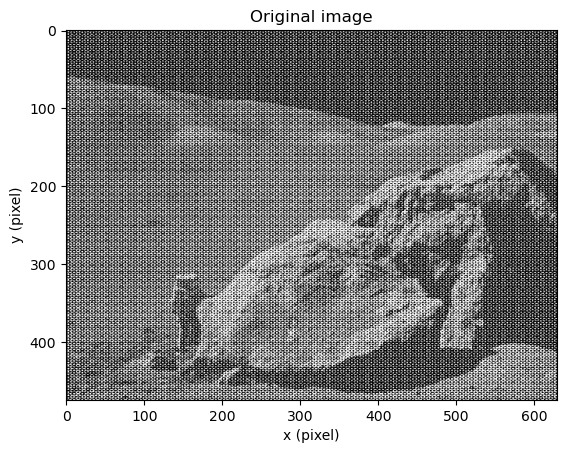

The above image contains a lot of periodic noise and therefore the image is not clear.


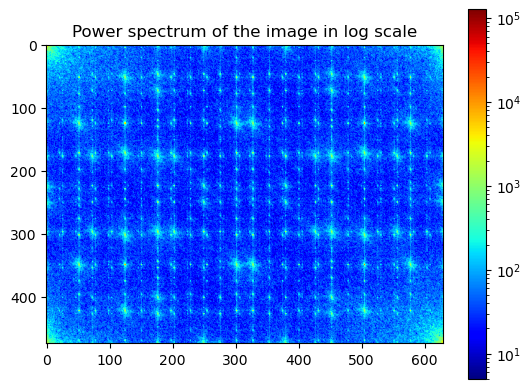

We have to use the logarithmic colormap, because the difference are very little such that you cannot visualize them otherwise.
For the periodicity of the FFT, higher frequencies occupy the most central slots of the frequency spectrum of the image while lower frequencies are on the corners. For better viewing, we can shift the zero frequencies in the center of the plot and the higher frequencies in the corners.


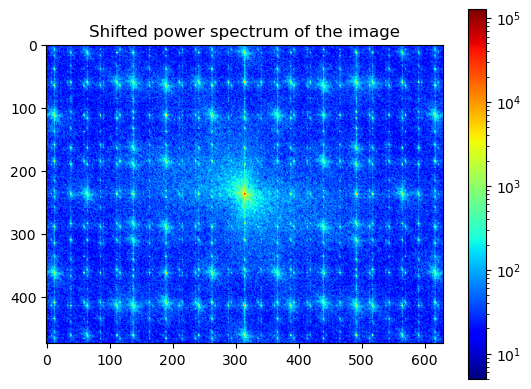

Now to cleaner the image we do a low pass filter where we remove the higher values of the frequencies (equating those frequencies to 0).
We perform a rectangular filter around the zero of frequencies for different filter sizes (using the percentage of frequencies filtered out of the total frequencies).


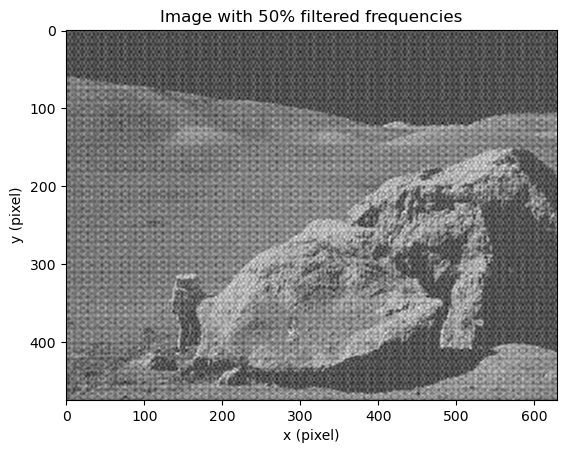

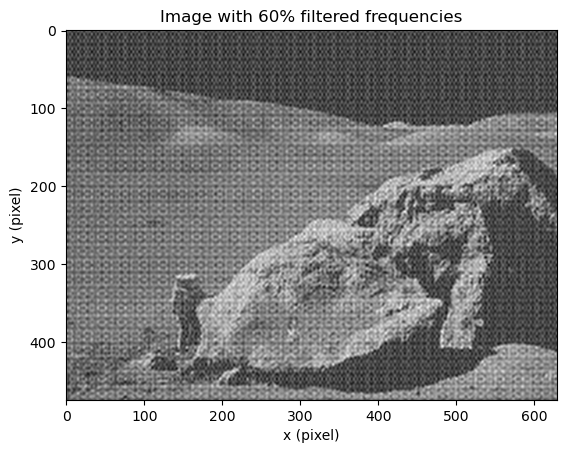

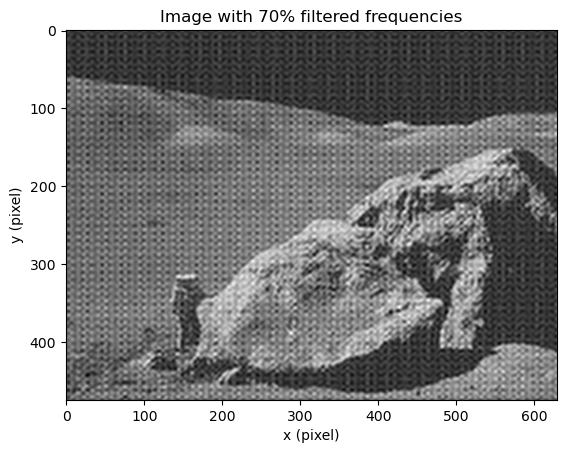

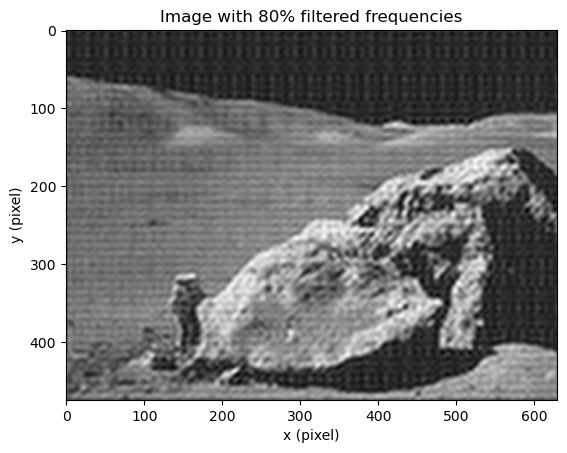

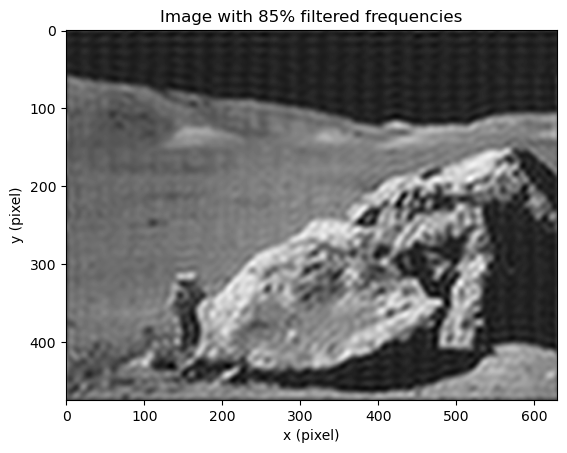

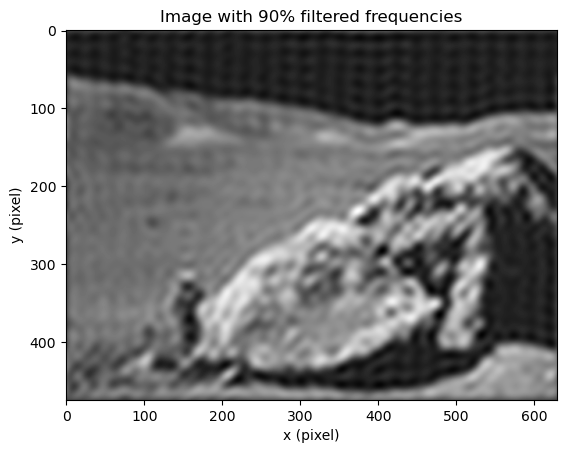

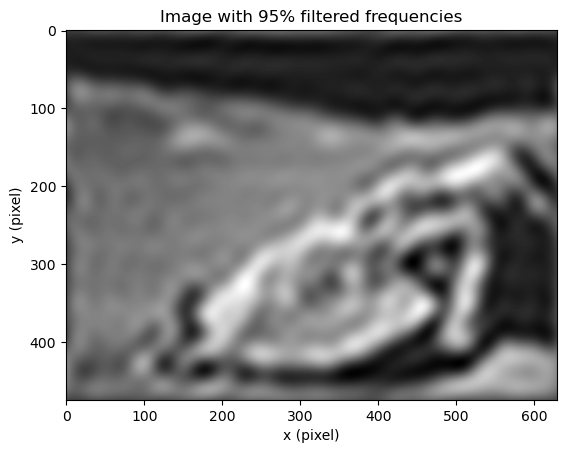

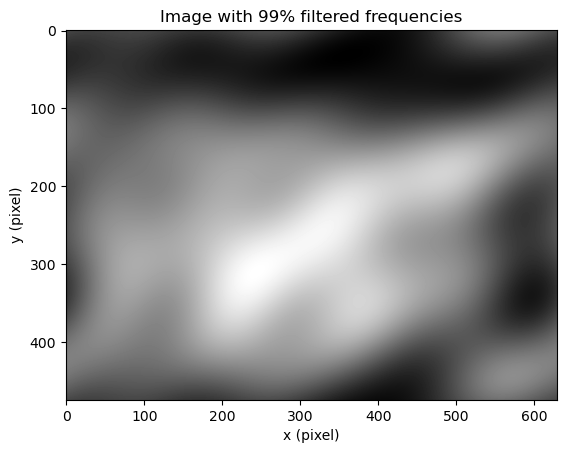

In [9]:
# Read and plot the image
image = plt.imread("images/moonlanding.png").astype(float)
plt.imshow(image, plt.cm.gray)
plt.title('Original image')
plt.xlabel('x (pixel)')
plt.ylabel('y (pixel)')
plt.show()

print("The above image contains a lot of periodic noise and therefore the image is not clear.")

# Compute the 2D FFT of the image
image_fft = fftpack.fft2(image) #This is of complex dtype

# Plot the power spectrum (absolute value of the FFT) of the image
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5), cmap = 'jet') #A logarithmic colormap
plt.title('Power spectrum of the image in log scale')
plt.colorbar()
plt.show()

print("We have to use the logarithmic colormap, because the difference are very little such that you cannot visualize them otherwise.")
print("For the periodicity of the FFT, higher frequencies occupy the most central slots of the frequency spectrum of the image while lower frequencies are on the corners. For better viewing, we can shift the zero frequencies in the center of the plot and the higher frequencies in the corners.")

# Shift of the 2D FFT matrix: lower frequencies are shifted to the center and higher frequencies to the edges
x_max = image_fft.shape[0]
y_max = image_fft.shape[1]
x_middle = round(x_max/2)
y_middle = round(y_max/2)
image_fft_shifted = image_fft.copy() # create a copy of the FFT
image_fft_shifted = np.roll(image_fft_shifted, x_middle, axis=0)
image_fft_shifted = np.roll(image_fft_shifted, y_middle, axis=1)

# Plot the shifted power spectrum
plt.imshow(np.abs(image_fft_shifted), norm=LogNorm(vmin=5), cmap = 'jet') #logarithmic colormap
plt.title('Shifted power spectrum of the image')
plt.colorbar()
plt.show()

print("Now to cleaner the image we do a low pass filter where we remove the higher values of the frequencies (equating those frequencies to 0).")
print("We perform a rectangular filter around the zero of frequencies for different filter sizes (using the percentage of frequencies filtered out of the total frequencies).")

# A rectangular filter sets all high-frequency components to zero, then the denoise image from the filtered spectrum is reconstructed

# Percentages used for filtering frequencies
percentage = [0.50, 0.40, 0.30, 0.20, 0.15, 0.10, 0.05, 0.01]

for p in percentage:
    # Create a copy of the FFT
    image_fft_filt = image_fft.copy()
    # Set to zero all rows and columns with indices between xmax*p/2 and ymax*(1-p/2):
    image_fft_filt[int(image_fft_filt.shape[0]*p/2):int(image_fft_filt.shape[0]*(1-p/2))] = 0
    image_fft_filt[:, int(image_fft_filt.shape[1]*p/2):int(image_fft_filt.shape[1]*(1-p/2))] = 0
    # Calculate the IFFT
    image_ifft_filt = fftpack.ifft2(image_fft_filt)
    # Only take the real part and plot the result of the IFFT
    plt.imshow(image_ifft_filt.real, plt.cm.gray)
    plt.title('Image with {}% filtered frequencies'.format(int((1-p)*100)))
    plt.xlabel('x (pixel)')
    plt.ylabel('y (pixel)')
    plt.show()

Let's compare the filtered image with 85% of the higher frequencies removed (using a rectangular filter) compared to the original image:


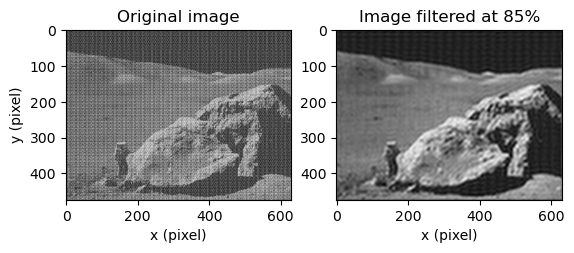

A better solution is provided by a circular filter instead of a rectangular one:


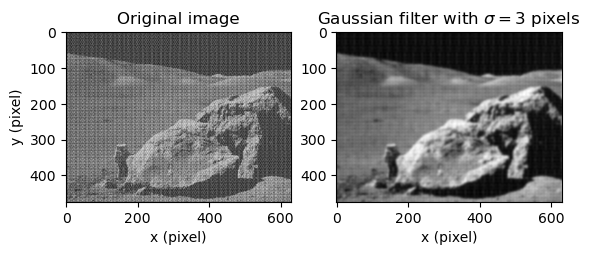

In [10]:
print("Let's compare the filtered image with 85% of the higher frequencies removed (using a rectangular filter) compared to the original image:")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image, plt.cm.gray)
axarr[0].set_title('Original image')
axarr[0].set_xlabel('x (pixel)')
axarr[0].set_ylabel('y (pixel)')

p = 0.15
fft = fftpack.fft2(image)
fft[int(fft.shape[0]*p/2):int(fft.shape[0]*(1-p/2))] = 0
fft[:, int(fft.shape[1]*p/2):int(fft.shape[1]*(1-p/2))] = 0
ifft = fftpack.ifft2(fft)
axarr[1].imshow(ifft.real, plt.cm.gray)
axarr[1].set_title('Image filtered at {}%'.format(int((1-p)*100)))
axarr[1].set_xlabel('x (pixel)')
plt.show()

print("A better solution is provided by a circular filter instead of a rectangular one:")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image, plt.cm.gray)
axarr[0].set_title('Original image')
axarr[0].set_xlabel('x (pixel)')
axarr[0].set_ylabel('y (pixel)')

image_gauss_filt = gaussian_filter(image, sigma=3)
axarr[1].imshow(image_gauss_filt, plt.cm.gray)
axarr[1].set_title('Gaussian filter with $\sigma = 3 \ \mathrm{pixels}$')
axarr[1].set_xlabel('x (pixel)')
plt.show()